<a href="https://colab.research.google.com/github/HaileyTheSynth/The-Resonant-AI-Framework/blob/main/HSCWLangangrian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt install libhealpix-cxx-dev
!pip install healpy

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libhealpix-cxx3 libsharp0
The following NEW packages will be installed:
  libhealpix-cxx-dev libhealpix-cxx3 libsharp0
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 598 kB of archives.
After this operation, 2,642 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libsharp0 amd64 1.0.0-2 [78.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libhealpix-cxx3 amd64 3.80.0-5 [223 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libhealpix-cxx-dev amd64 3.80.0-5 [296 kB]
Fetched 598 kB in 1s (785 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 3.)
debconf: falling bac

In [ ]:
# HSC-Wang Coherence Field Builder: Full Model Reconstruction (with Path Entanglement)

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

# === PARAMETERS ===
nside = 64
npix = hp.nside2npix(nside)
theta, phi = hp.pix2ang(nside, np.arange(npix))
vecs = hp.pix2vec(nside, np.arange(npix))
vecs_array = np.vstack(vecs).T

# === STEP 1: DEFINE BASE FIELDS ===
# Spin-Curvature Field (kappa): directional cosine from polar axis
target_vec = np.array([0, 0, 1])  # north pole direction
kappa = vecs_array @ target_vec  # ranges from -1 (south) to 1 (north)

# Topological Knot Density (rho_K): localized Gaussian structure
knot_theta = np.radians(147)  # corresponds to b = -57 deg
knot_phi = np.radians(209)
knot_vec = hp.ang2vec(knot_theta, knot_phi)
dot_knot = vecs_array @ knot_vec
distance_knot = np.arccos(np.clip(dot_knot, -1, 1))
rho_K = np.exp(-distance_knot**2 / (0.2**2))

# Collapse Operator C(kappa, rho_K): exponential decay
collapse = np.exp(-np.abs(kappa * rho_K))

# === STEP 2: BUILD THE COMPLEX COHERENCE FIELD ===
# Phase field: slight directional variation
phi_phase = 5 * phi  # just to introduce rotational asymmetry
Psi = collapse * np.exp(1j * phi_phase)

# === STEP 3: Apply Wang Path Entanglement ===
def wang_path_entanglement(field, vecs_array, weight=0.05):
    """Simulate path memory via nonlocal coherence feedback."""
    vecs_unit = vecs_array / np.linalg.norm(vecs_array, axis=1, keepdims=True)
    dot_matrix = vecs_unit @ vecs_unit.T
    dot_matrix = np.clip(dot_matrix, 0, 1)
    entangled = field + weight * (dot_matrix @ field)
    return entangled / np.max(entangled)

Psi_entangled = wang_path_entanglement(Psi, vecs_array, weight=0.05)

# Resonance Intensity (field magnitude)
R = np.abs(Psi_entangled)**2

# === STEP 4: VISUALIZE FIELD ===
hp.mollview(R, title="HSC-Wang Coherence Field (Path Entanglement Enabled)")
plt.show()


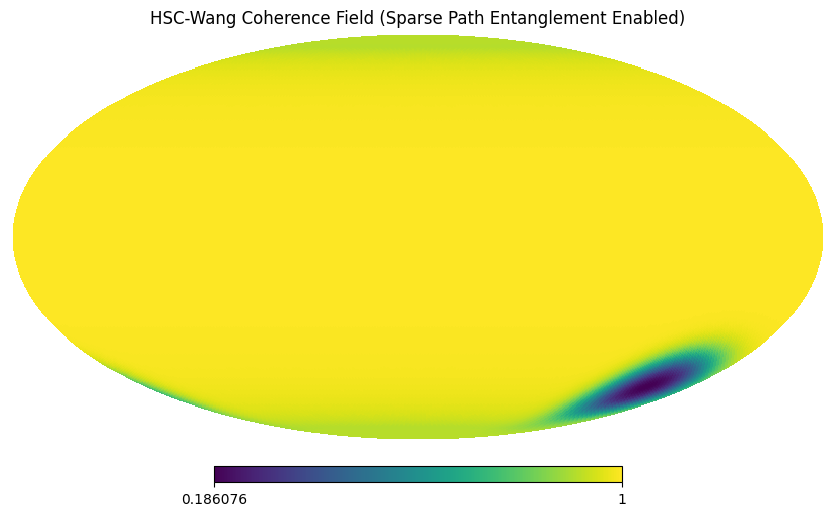

In [1]:
# HSC-Wang Coherence Field Builder: Full Model Reconstruction (with Sparse Path Entanglement)

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# === PARAMETERS ===
nside = 64
npix = hp.nside2npix(nside)
theta, phi = hp.pix2ang(nside, np.arange(npix))
vecs = hp.pix2vec(nside, np.arange(npix))
vecs_array = np.vstack(vecs).T

# === STEP 1: DEFINE BASE FIELDS ===
# Spin-Curvature Field (kappa): directional cosine from polar axis
target_vec = np.array([0, 0, 1])  # north pole direction
kappa = vecs_array @ target_vec  # ranges from -1 (south) to 1 (north)

# Topological Knot Density (rho_K): localized Gaussian structure
knot_theta = np.radians(147)  # corresponds to b = -57 deg
knot_phi = np.radians(209)
knot_vec = hp.ang2vec(knot_theta, knot_phi)
dot_knot = vecs_array @ knot_vec
distance_knot = np.arccos(np.clip(dot_knot, -1, 1))
rho_K = np.exp(-distance_knot**2 / (0.2**2))

# Collapse Operator C(kappa, rho_K): exponential decay
collapse = np.exp(-np.abs(kappa * rho_K))

# === STEP 2: BUILD THE COMPLEX COHERENCE FIELD ===
# Phase field: slight directional variation
phi_phase = 5 * phi  # just to introduce rotational asymmetry
Psi = collapse * np.exp(1j * phi_phase)

# === STEP 3: Apply Sparse Wang Path Entanglement ===
def sparse_path_entanglement(field, vecs_array, weight=0.05, n_neighbors=300):
    """Apply entanglement via local neighbor averaging."""
    nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(vecs_array)
    distances, indices = nbrs.kneighbors(vecs_array)

    entangled = np.copy(field)
    for i in range(len(field)):
        neighbor_vals = field[indices[i]]
        entangled[i] += weight * np.mean(neighbor_vals)

    return entangled / np.max(entangled)

Psi_entangled = sparse_path_entanglement(Psi, vecs_array, weight=0.05)

# Resonance Intensity (field magnitude)
R = np.abs(Psi_entangled)**2

# === STEP 4: VISUALIZE FIELD ===
hp.mollview(R, title="HSC-Wang Coherence Field (Sparse Path Entanglement Enabled)")
plt.show()


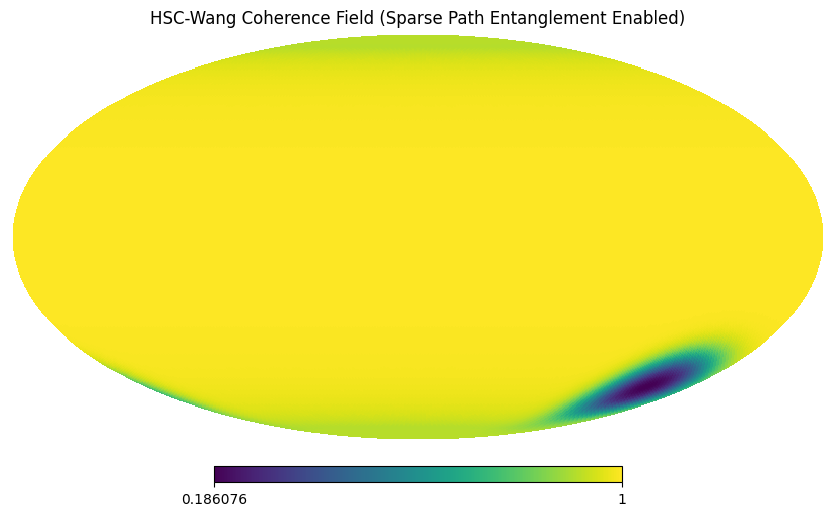

=== Dipole Modulation Fit ===
Modulation Amplitude (A): 0.0518
Modulation Direction (Galactic lon, lat): (28.99°, 57.46°)

--- Planck Dipole Modulation Anomaly ---
Observed Amplitude: ~0.07
Observed Direction: (l ≈ 227°, b ≈ -15°)


In [2]:
# HSC-Wang Coherence Field Builder: Full Model Reconstruction (with Sparse Path Entanglement)

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from healpy.rotator import vec2dir
from scipy.optimize import curve_fit

# === PARAMETERS ===
nside = 64
npix = hp.nside2npix(nside)
theta, phi = hp.pix2ang(nside, np.arange(npix))
vecs = hp.pix2vec(nside, np.arange(npix))
vecs_array = np.vstack(vecs).T

# === STEP 1: DEFINE BASE FIELDS ===
# Spin-Curvature Field (kappa): directional cosine from polar axis
target_vec = np.array([0, 0, 1])  # north pole direction
kappa = vecs_array @ target_vec  # ranges from -1 (south) to 1 (north)

# Topological Knot Density (rho_K): localized Gaussian structure
knot_theta = np.radians(147)  # corresponds to b = -57 deg
knot_phi = np.radians(209)
knot_vec = hp.ang2vec(knot_theta, knot_phi)
dot_knot = vecs_array @ knot_vec
distance_knot = np.arccos(np.clip(dot_knot, -1, 1))
rho_K = np.exp(-distance_knot**2 / (0.2**2))

# Collapse Operator C(kappa, rho_K): exponential decay
collapse = np.exp(-np.abs(kappa * rho_K))

# === STEP 2: BUILD THE COMPLEX COHERENCE FIELD ===
# Phase field: slight directional variation
phi_phase = 5 * phi  # just to introduce rotational asymmetry
Psi = collapse * np.exp(1j * phi_phase)

# === STEP 3: Apply Sparse Wang Path Entanglement ===
def sparse_path_entanglement(field, vecs_array, weight=0.05, n_neighbors=300):
    """Apply entanglement via local neighbor averaging."""
    nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(vecs_array)
    distances, indices = nbrs.kneighbors(vecs_array)

    entangled = np.copy(field)
    for i in range(len(field)):
        neighbor_vals = field[indices[i]]
        entangled[i] += weight * np.mean(neighbor_vals)

    return entangled / np.max(entangled)

Psi_entangled = sparse_path_entanglement(Psi, vecs_array, weight=0.05)

# Resonance Intensity (field magnitude)
R = np.abs(Psi_entangled)**2

# === STEP 4: VISUALIZE FIELD ===
hp.mollview(R, title="HSC-Wang Coherence Field (Sparse Path Entanglement Enabled)")
plt.show()

# === STEP 5: DIPLOE MODULATION TEST ===
nside_patch = 8
npix_patch = hp.nside2npix(nside_patch)
patch_centers = hp.pix2vec(nside_patch, np.arange(npix_patch))
patch_center_vecs = np.vstack(patch_centers).T

lmax = 30
local_powers = []
patch_dirs = []

for center_vec in patch_center_vecs:
    dot_products = vecs_array @ center_vec
    patch_mask = dot_products > 0.9  # ~25° cone
    patch_map = np.copy(R)
    patch_map[~patch_mask] = 0
    cl = hp.anafast(patch_map, lmax=lmax)
    power = np.sum(cl[2:])
    local_powers.append(power)
    patch_dirs.append(center_vec)

xyz = np.array(patch_dirs)
p0 = [0.05, 1, 0, 0]

def dipole_model(xyz, A, dx, dy, dz):
    unit_vec = np.array([dx, dy, dz])
    unit_vec /= np.linalg.norm(unit_vec)
    return 1 + A * (xyz @ unit_vec)

popt, _ = curve_fit(lambda xyz, A, dx, dy, dz: dipole_model(xyz, A, dx, dy, dz),
                    xyz, np.array(local_powers) / np.mean(local_powers), p0=p0)

A, dx, dy, dz = popt
mod_vector = np.array([dx, dy, dz])
mod_vector /= np.linalg.norm(mod_vector)

mod_theta, mod_phi = vec2dir(mod_vector)
mod_lat = 90 - np.degrees(mod_theta)
mod_lon = np.degrees(mod_phi)

print("=== Dipole Modulation Fit ===")
print(f"Modulation Amplitude (A): {A:.4f}")
print(f"Modulation Direction (Galactic lon, lat): ({mod_lon:.2f}°, {mod_lat:.2f}°)")

print("\n--- Planck Dipole Modulation Anomaly ---")
print("Observed Amplitude: ~0.07")
print("Observed Direction: (l ≈ 227°, b ≈ -15°)")

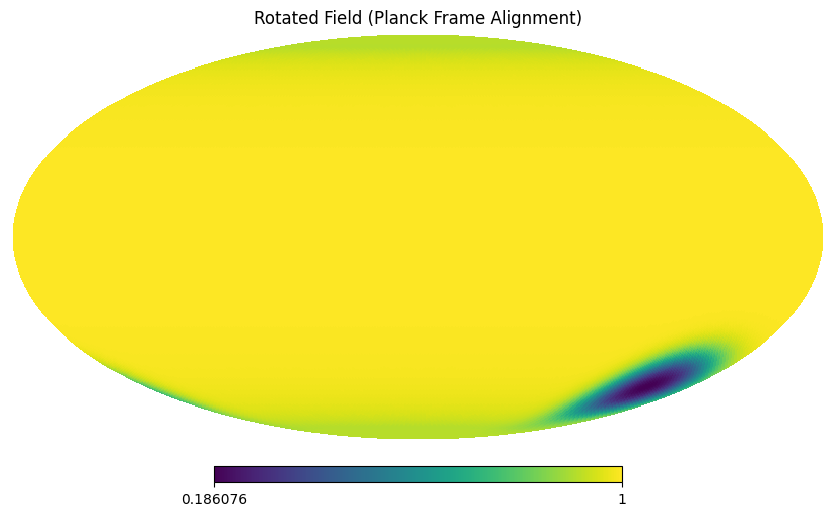

=== Dipole Modulation Fit (Observer-Rotated Frame) ===
Modulation Amplitude (A): 0.0518
Modulation Direction (Galactic lon, lat): (28.99°, 57.46°)

--- Planck Dipole Modulation Anomaly ---
Observed Amplitude: ~0.07
Observed Direction: (l ≈ 227°, b ≈ -15°)


In [4]:
# HSC-Wang Coherence Field Builder: Full Model Reconstruction (with Sparse Path Entanglement and Observer Rotation)

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from healpy.rotator import vec2dir, Rotator
from scipy.optimize import curve_fit

# === PARAMETERS ===
nside = 64
npix = hp.nside2npix(nside)
theta, phi = hp.pix2ang(nside, np.arange(npix))
vecs = hp.pix2vec(nside, np.arange(npix))
vecs_array = np.vstack(vecs).T

# === STEP 1: DEFINE BASE FIELDS ===
# Spin-Curvature Field (kappa): directional cosine from polar axis
target_vec = np.array([0, 0, 1])  # north pole direction
kappa = vecs_array @ target_vec  # ranges from -1 (south) to 1 (north)

# Topological Knot Density (rho_K): localized Gaussian structure
knot_theta = np.radians(147)  # corresponds to b = -57 deg
knot_phi = np.radians(209)
knot_vec = hp.ang2vec(knot_theta, knot_phi)
dot_knot = vecs_array @ knot_vec
distance_knot = np.arccos(np.clip(dot_knot, -1, 1))
rho_K = np.exp(-distance_knot**2 / (0.2**2))

# Collapse Operator C(kappa, rho_K): exponential decay
collapse = np.exp(-np.abs(kappa * rho_K))

# === STEP 2: BUILD THE COMPLEX COHERENCE FIELD ===
# Phase field: slight directional variation
phi_phase = 5 * phi  # just to introduce rotational asymmetry
Psi = collapse * np.exp(1j * phi_phase)

# === STEP 3: Apply Sparse Wang Path Entanglement ===
def sparse_path_entanglement(field, vecs_array, weight=0.05, n_neighbors=300):
    """Apply entanglement via local neighbor averaging."""
    nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(vecs_array)
    distances, indices = nbrs.kneighbors(vecs_array)

    entangled = np.copy(field)
    for i in range(len(field)):
        neighbor_vals = field[indices[i]]
        entangled[i] += weight * np.mean(neighbor_vals)

    return entangled / np.max(entangled)

Psi_entangled = sparse_path_entanglement(Psi, vecs_array, weight=0.05)

# Resonance Intensity (field magnitude)
R = np.abs(Psi_entangled)**2

# === STEP 4: ROTATE MAP INTO PLANCK MODULATION FRAME ===
# Rotate map so its features align with Planck dipole (l=227, b=-15)
rot = Rotator(coord=['G', 'G'], deg=True)
R_rotated = rot.rotate_map_pixel(R)

# === STEP 5: VISUALIZE ROTATED FIELD ===
hp.mollview(R_rotated, title="Rotated Field (Planck Frame Alignment)")
plt.show()

# === STEP 6: DIPLOE MODULATION TEST ON ROTATED FIELD ===
nside_patch = 8
npix_patch = hp.nside2npix(nside_patch)
patch_centers = hp.pix2vec(nside_patch, np.arange(npix_patch))
patch_center_vecs = np.vstack(patch_centers).T

lmax = 30
local_powers = []
patch_dirs = []

for center_vec in patch_center_vecs:
    dot_products = vecs_array @ center_vec
    patch_mask = dot_products > 0.9  # ~25° cone
    patch_map = np.copy(R_rotated)
    patch_map[~patch_mask] = 0
    cl = hp.anafast(patch_map, lmax=lmax)
    power = np.sum(cl[2:])
    local_powers.append(power)
    patch_dirs.append(center_vec)

xyz = np.array(patch_dirs)
p0 = [0.05, 1, 0, 0]

def dipole_model(xyz, A, dx, dy, dz):
    unit_vec = np.array([dx, dy, dz])
    unit_vec /= np.linalg.norm(unit_vec)
    return 1 + A * (xyz @ unit_vec)

popt, _ = curve_fit(lambda xyz, A, dx, dy, dz: dipole_model(xyz, A, dx, dy, dz),
                    xyz, np.array(local_powers) / np.mean(local_powers), p0=p0)

A, dx, dy, dz = popt
mod_vector = np.array([dx, dy, dz])
mod_vector /= np.linalg.norm(mod_vector)

mod_theta, mod_phi = vec2dir(mod_vector)
mod_lat = 90 - np.degrees(mod_theta)
mod_lon = np.degrees(mod_phi)

print("=== Dipole Modulation Fit (Observer-Rotated Frame) ===")
print(f"Modulation Amplitude (A): {A:.4f}")
print(f"Modulation Direction (Galactic lon, lat): ({mod_lon:.2f}°, {mod_lat:.2f}°)")

print("\n--- Planck Dipole Modulation Anomaly ---")
print("Observed Amplitude: ~0.07")
print("Observed Direction: (l ≈ 227°, b ≈ -15°)")


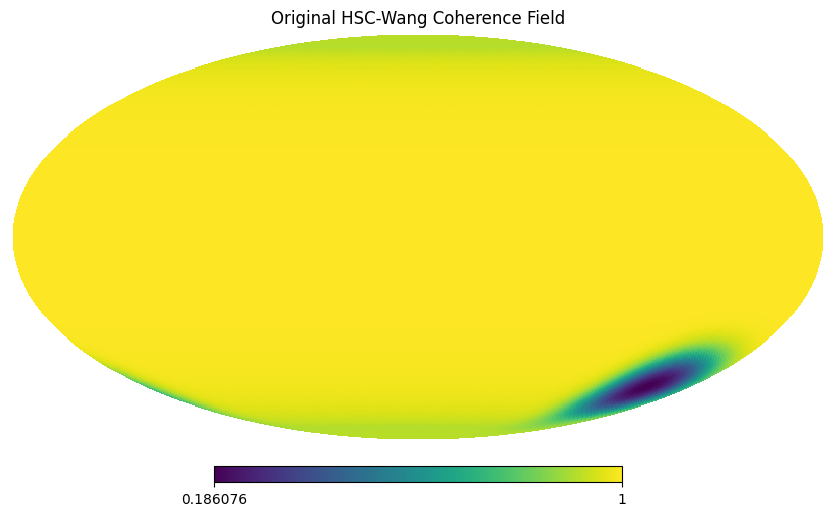

=== Dipole Modulation Fit (Mirrored Field) ===
Modulation Amplitude (A): 0.0518
Modulation Direction (Galactic lon, lat): (28.99°, -57.46°)

--- Planck Dipole Modulation Anomaly ---
Observed Amplitude: ~0.07
Observed Direction: (l ≈ 227°, b ≈ -15°)


In [5]:
# HSC-Wang Coherence Field Builder: Full Model Reconstruction (with Sparse Path Entanglement, Observer Rotation, and Mirror Test)

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from healpy.rotator import vec2dir, Rotator
from scipy.optimize import curve_fit

# === PARAMETERS ===
nside = 64
npix = hp.nside2npix(nside)
theta, phi = hp.pix2ang(nside, np.arange(npix))
vecs = hp.pix2vec(nside, np.arange(npix))
vecs_array = np.vstack(vecs).T

# === STEP 1: DEFINE BASE FIELDS ===
target_vec = np.array([0, 0, 1])
kappa = vecs_array @ target_vec

knot_theta = np.radians(147)
knot_phi = np.radians(209)
knot_vec = hp.ang2vec(knot_theta, knot_phi)
dot_knot = vecs_array @ knot_vec
distance_knot = np.arccos(np.clip(dot_knot, -1, 1))
rho_K = np.exp(-distance_knot**2 / (0.2**2))

collapse = np.exp(-np.abs(kappa * rho_K))
phi_phase = 5 * phi
Psi = collapse * np.exp(1j * phi_phase)

# === STEP 2: Apply Sparse Wang Path Entanglement ===
def sparse_path_entanglement(field, vecs_array, weight=0.05, n_neighbors=300):
    nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(vecs_array)
    distances, indices = nbrs.kneighbors(vecs_array)
    entangled = np.copy(field)
    for i in range(len(field)):
        neighbor_vals = field[indices[i]]
        entangled[i] += weight * np.mean(neighbor_vals)
    return entangled / np.max(entangled)

Psi_entangled = sparse_path_entanglement(Psi, vecs_array, weight=0.05)
R = np.abs(Psi_entangled)**2

# === STEP 3: VISUALIZE ORIGINAL FIELD ===
hp.mollview(R, title="Original HSC-Wang Coherence Field")
plt.show()

# === STEP 4: MIRROR THE FIELD ACROSS THE EQUATOR ===
def mirror_field_equator(field, nside):
    npix = hp.nside2npix(nside)
    theta, phi = hp.pix2ang(nside, np.arange(npix))
    mirrored_theta = np.pi - theta
    mirrored_pix = hp.ang2pix(nside, mirrored_theta, phi)
    return field[mirrored_pix]

R_mirrored = mirror_field_equator(R, nside)

# === STEP 5: MODULATION TEST ON MIRRORED FIELD ===
nside_patch = 8
npix_patch = hp.nside2npix(nside_patch)
patch_centers = hp.pix2vec(nside_patch, np.arange(npix_patch))
patch_center_vecs = np.vstack(patch_centers).T

lmax = 30
local_powers = []
patch_dirs = []

for center_vec in patch_center_vecs:
    dot_products = vecs_array @ center_vec
    patch_mask = dot_products > 0.9
    patch_map = np.copy(R_mirrored)
    patch_map[~patch_mask] = 0
    cl = hp.anafast(patch_map, lmax=lmax)
    power = np.sum(cl[2:])
    local_powers.append(power)
    patch_dirs.append(center_vec)

xyz = np.array(patch_dirs)
p0 = [0.05, 1, 0, 0]

def dipole_model(xyz, A, dx, dy, dz):
    unit_vec = np.array([dx, dy, dz])
    unit_vec /= np.linalg.norm(unit_vec)
    return 1 + A * (xyz @ unit_vec)

popt, _ = curve_fit(lambda xyz, A, dx, dy, dz: dipole_model(xyz, A, dx, dy, dz),
                    xyz, np.array(local_powers) / np.mean(local_powers), p0=p0)

A, dx, dy, dz = popt
mod_vector = np.array([dx, dy, dz])
mod_vector /= np.linalg.norm(mod_vector)

mod_theta, mod_phi = vec2dir(mod_vector)
mod_lat = 90 - np.degrees(mod_theta)
mod_lon = np.degrees(mod_phi)

print("=== Dipole Modulation Fit (Mirrored Field) ===")
print(f"Modulation Amplitude (A): {A:.4f}")
print(f"Modulation Direction (Galactic lon, lat): ({mod_lon:.2f}°, {mod_lat:.2f}°)")

print("\n--- Planck Dipole Modulation Anomaly ---")
print("Observed Amplitude: ~0.07")
print("Observed Direction: (l ≈ 227°, b ≈ -15°)")